AI가 작성한 텍스트를 판별하는 첼린지


평가 지표는 **ROC-AUC**

데이터에는 클래스의 불균형이 심하지만 결측치는 없음

In [1]:
import pandas as pd

train_df = pd.read_csv('dacon/train.csv')
test_df = pd.read_csv('dacon/test.csv')
submission_df = pd.DataFrame({'ID': test_df['ID']})

display(train_df.head())
display(test_df.head())

print(train_df.isnull().sum())
print(test_df.isnull().sum())

,title,full_text,generated
0,카호올라웨섬,카호올라웨섬은 하와이 제도를 구성하는 8개의 화산섬 가운데 하나로 면적은 115.5...,0
1,청색거성,"천문학에서 청색거성(靑色巨星, )은 광도 분류에서 III형(거성) 또는 II형(밝은...",0
2,엘자스-로트링겐 평의회 공화국,엘자스-로트링겐 평의회 공화국은 1차대전 말기 독일 혁명 와중에 엘자스-로트링겐에서...,0
3,윌리엄 페니 브룩스,"윌리엄 페니 브룩스(, 1809년 8월 13일 ~ 1895년 12월 11일)는 잉글...",0
4,미그로,"미그로 또는 미그로스(""Migros"")는 스위스 최대 소매 회사이자, 최대 슈퍼마켓...",0


,ID,title,paragraph_index,paragraph_text
0,TEST_0000,공중 도덕의 의의와 필요성,0,도덕이란 원래 개인의 자각에서 출발해 자기 의지로써 행동하는 일이다. 그러므로 도덕...
1,TEST_0001,공중 도덕의 의의와 필요성,1,도덕은 단순히 개인의 문제나 사회의 문제로 한정될 수 없다. 개인적인 측면과 사회적...
2,TEST_0002,공중 도덕의 의의와 필요성,2,"여기에 이른바 공중도덕은 실천적, 사회적 도덕의 한 부문이다. 즉, 공중 도덕이라 ..."
3,TEST_0003,공중 도덕의 의의와 필요성,3,우리가 공동 생활을 하는 데 있어서 공중 도덕이 필요함은 위에서 말한 것처럼 알 수...
4,TEST_0004,풍습과 그 개선,0,인간 사회에서는 다 함께 지켜야 할 어떤 기준이 있어 이를 따르면 옳다고 하고 따르...


title        0
full_text    0
generated    0
dtype: int64
ID                 0
title              0
paragraph_index    0
paragraph_text     0
dtype: int64


In [2]:
print(train_df["full_text"][0])
print(test_df["paragraph_text"][0])

카호올라웨섬은 하와이 제도를 구성하는 8개의 화산섬 가운데 하나로 면적은 115.5km2, 높이는 452m이다. 하와이 제도에서 가장 작은 화산섬이자 무인도이며 길이는 18km, 너비는 10km이다. 
 마우이섬에서 남서쪽으로 약 11km 정도 떨어진 곳에 위치하며 라나이섬의 남동쪽에 위치한다. 고도가 낮고 북동쪽에서 불어오는 무역풍을 통해 산악 지대에서 내리는 비를 형성하지 못하기 때문에 건조한 기후를 띤다. 마우이섬 화산의 비그늘에 속해 있기 때문에 섬 전체 면적의 1/4 이상이 부식되어 있다. 
 1000년경부터 사람이 거주했으며 해안 지대에는 소규모 임시 어촌이 형성되었다. 섬 안에는 주민들이 돌로 만든 제단에서 종교 의식을 거행한 흔적들, 주민들이 암석이나 평평한 돌에 그림을 그린 흔적들이 남아 있다. 1778년부터 1800년대까지 이 지역을 지나 항해하던 사람들의 보고에 따르면 카호올라웨섬은 무인도였고 나무도 물도 없는 불모지였다고 한다. 
 1830년대에는 하와이 왕국의 카메하메하 3세 국왕에 의해 남자 죄수들의 유형지로 사용되었지만 1853년에 폐지되었다. 1858년에는 하와이 정부가 목장 사업가들에게 카호올라웨섬을 양도했지만 가뭄과 과도한 방목으로 인해 땅이 말라갔다. 또한 강한 무역풍으로 인해 표토의 대부분이 날아가면서 붉은 경반층만 남게 되었다. 
 1910년부터 1918년까지 하와이 준주가 섬의 원래 모습을 복원하기 위해 이 섬을 천연보호구역으로 지정했지만 큰 성과를 거두지 못했다. 
 1941년 12월 7일에 일어난 일본 제국 해군의 진주만 공격을 계기로 카호올라웨섬은 태평양 전쟁에 참전한 미국 병사들의 훈련소로 사용되었다. 1981년 3월 18일에는 미국 국립사적지에 등재되었다.
도덕이란 원래 개인의 자각에서 출발해 자기 의지로써 행동하는 일이다. 그러므로 도덕은 어디까지나 정신의 문제이고, 각자의 마음씨에 달려있는 일이다. 여기에서 도덕의 문제는 철학적 이론으로 발전하였으며, 고상하고 심원한 이론 체계에 기울어지는 경향이 많았다. 이

In [3]:
print(len(train_df))
print(len(test_df))
print()

gen_values = train_df["generated"].value_counts()
print(gen_values)

97172
1962

generated
0    89177
1     7995
Name: count, dtype: int64


In [4]:
train_df['text_length'] = train_df['full_text'].apply(len)

text_length_quartiles = train_df['text_length'].describe()

print("텍스트 길이의 4분위수:")
print(text_length_quartiles)

텍스트 길이의 4분위수:
count    97172.000000
mean      2323.227823
std       3333.685020
min        393.000000
25%        925.000000
50%       1331.000000
75%       2337.000000
max      98549.000000
Name: text_length, dtype: float64


In [5]:
train_paragraphs = []
train_paragraph_labels = []

for idx, row in train_df.iterrows():
    full_text = row["full_text"]
    label = row["generated"]

    # 줄 단위로 끊기
    paragraphs = [p.strip() for p in full_text.split("\n") if p.strip()]

    train_paragraphs.extend(paragraphs)
    train_paragraph_labels.extend([label] * len(paragraphs))

train_processed_df = pd.DataFrame({
    'paragraph_text': train_paragraphs,
    'generated': train_paragraph_labels
})

display(train_processed_df.head())

,paragraph_text,generated
0,카호올라웨섬은 하와이 제도를 구성하는 8개의 화산섬 가운데 하나로 면적은 115.5...,0
1,마우이섬에서 남서쪽으로 약 11km 정도 떨어진 곳에 위치하며 라나이섬의 남동쪽에 ...,0
2,1000년경부터 사람이 거주했으며 해안 지대에는 소규모 임시 어촌이 형성되었다. 섬...,0
3,1830년대에는 하와이 왕국의 카메하메하 3세 국왕에 의해 남자 죄수들의 유형지로 ...,0
4,1910년부터 1918년까지 하와이 준주가 섬의 원래 모습을 복원하기 위해 이 섬을...,0


In [6]:
train_processed_df['text_length'] = train_processed_df['paragraph_text'].apply(len)

text_length_quartiles = train_processed_df['text_length'].describe()

pd.options.display.float_format = '{:.2f}'.format
print("텍스트 길이의 4분위수:")
print(text_length_quartiles)

텍스트 길이의 4분위수:
count   1226364.00
mean        181.51
std         151.88
min           9.00
25%          77.00
50%         148.00
75%         245.00
max       19124.00
Name: text_length, dtype: float64


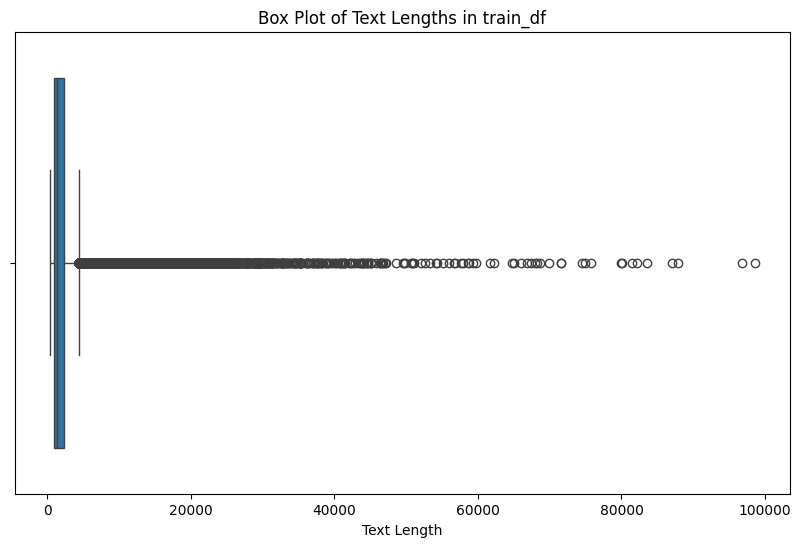

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of the text lengths
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['text_length'])
plt.title('Box Plot of Text Lengths in train_df')
plt.xlabel('Text Length')
plt.show()

In [8]:
gen_values = train_processed_df["generated"].value_counts()
print(gen_values)

generated
0    1125652
1     100712
Name: count, dtype: int64


In [9]:
from sklearn.utils import resample

df_majority = train_processed_df[train_processed_df.generated == 0]
df_minority = train_processed_df[train_processed_df.generated == 1]

df_majority_undersampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

train_undersampled_df = pd.concat([df_minority, df_majority_undersampled])

print("--- 언더샘플링 후 클래스 분포 ---")
print(train_undersampled_df.generated.value_counts())

train_undersampled_df = train_undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n--- 언더샘플링 및 셔플 후 데이터프레임 (샘플) ---")
display(train_undersampled_df.head())

--- 언더샘플링 후 클래스 분포 ---
generated
1    100712
0    100712
Name: count, dtype: int64

--- 언더샘플링 및 셔플 후 데이터프레임 (샘플) ---


,paragraph_text,generated,text_length
0,"이사벨 데 포르투갈(, 1428년 8월 15일 ~ 1496년 8월 15일)는 카스티...",0,225
1,1970년 요르단 내전 이후 요르단에서 많은 팔레스타인 난민이 레바논으로 몰려들면서...,1,315
2,식물 보존과 유서 깊은 역사적 풍경의 유산적 가치는 점점 더 중요시되어 다루어졌다....,0,96
3,1세기 말에서 2세기 초에 기록된 플루타르크의 <영웅전>은 당시 상황을 이렇게 설명...,1,52
4,가와사키시(도쿄 도 접경지역)를 포함한다.,1,23


언더샘플링된 데이터셋의 텍스트 길이 4분위수:
count   201424.00
mean       181.31
std        144.16
min          9.00
25%         80.00
50%        150.00
75%        243.00
max       6512.00
Name: text_length, dtype: float64


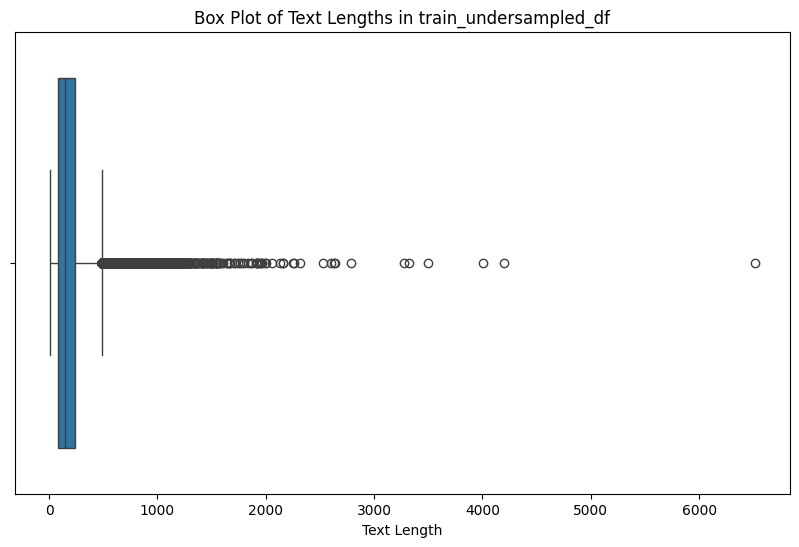

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each text entry in the 'paragraph_text' column of the undersampled data
train_undersampled_df['text_length'] = train_undersampled_df['paragraph_text'].apply(len)

# Get the descriptive statistics including quartiles for the text length
text_length_quartiles_us = train_undersampled_df['text_length'].describe()

# Display the quartiles
print("언더샘플링된 데이터셋의 텍스트 길이 4분위수:")
print(text_length_quartiles_us)

# Create a box plot of the text lengths for the undersampled data
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_undersampled_df['text_length'])
plt.title('Box Plot of Text Lengths in train_undersampled_df')
plt.xlabel('Text Length')
plt.show()

In [11]:
from transformers import AutoModel, AutoTokenizer

# Load the model and tokenizer from Hugging Face
model_name = "team-lucid/deberta-v3-base-korean"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

print(f"Successfully loaded model: {model_name}")
print("Tokenizer:", tokenizer)
print("Model:", model)

Successfully loaded model: team-lucid/deberta-v3-base-korean
Tokenizer: DebertaV2TokenizerFast(name_or_path='team-lucid/deberta-v3-base-korean', vocab_size=64001, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	64000: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, no

In [12]:
from transformers import AutoConfig

# Access the maximum token length from the tokenizer
max_token_length = tokenizer.model_max_length

config = AutoConfig.from_pretrained(model_name)

max_length = config.max_position_embeddings
print(max_length)

512


In [13]:
tokenized_train = tokenizer(
    train_undersampled_df['paragraph_text'].tolist(),
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='pt'
)

print("Tokenization complete for train_undersampled_df.")
print(f"Shape of input IDs: {tokenized_train['input_ids'].shape}")
print(f"Shape of attention mask: {tokenized_train['attention_mask'].shape}")

Tokenization complete for train_undersampled_df.
Shape of input IDs: torch.Size([201424, 512])
Shape of attention mask: torch.Size([201424, 512])


In [14]:
import torch
from torch.utils.data import Dataset
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments


class CustomDataset(Dataset):
    def __init__(self,encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key:val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])

        return item


train_labels = train_undersampled_df['generated'].tolist()
train_dataset = CustomDataset(tokenized_train, train_labels)

model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=500,
    save_strategy="epoch",
    # eval_strategy="epoch",
    # load_best_model_at_end=True,
    # metric_for_best_model="accuracy",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    # eval_dataset = val_dataset
)

trainer.train()

save_directory = "dacon/model"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at team-lucid/deberta-v3-base-korean and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,0.692000
100,0.693500
150,0.694600
200,0.692800
250,0.690100
300,0.693700
350,0.693100
400,0.694700
450,0.693400
500,0.683400


('dacon/model\\tokenizer_config.json',
 'dacon/model\\special_tokens_map.json',
 'dacon/model\\tokenizer.json')

In [15]:
from torch.utils.data import DataLoader, Dataset
from tqdm.auto import tqdm

save_directory = "dacon/model"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

class TestDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        return item

tokenized_test = tokenizer(
    test_df['paragraph_text'].tolist(),
    truncation=True,
    padding='max_length',
    max_length=max_length,
    return_tensors='pt'
)

test_dataset = TestDataset(tokenized_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()
all_predictions = []

for batch in tqdm(test_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    # AI 생성(label=1)일 확률만 추출
    predictions = torch.softmax(logits, dim=-1)[:, 1].cpu().numpy()
    all_predictions.extend(predictions)


submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'generated': all_predictions
})

submission_df.to_csv('submission.csv', index=False)

print("submission.csv 파일 생성이 완료되었습니다!")
display(submission_df.head())

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at team-lucid/deberta-v3-base-korean and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/62 [00:00<?, ?it/s]

submission.csv 파일 생성이 완료되었습니다!


,ID,generated
0,TEST_0000,0.50
1,TEST_0001,0.50
2,TEST_0002,0.50
3,TEST_0003,0.50
4,TEST_0004,0.50


In [16]:
# # Extract the first 100 rows
# train_demo_df = train_df.head(100)
# test_demo_df = test_df.head(100)

# # Define file paths for the demo files
# train_demo_path = '/content/dacon_extracted/train_demo.csv'
# test_demo_path = '/content/dacon_extracted/test_demo.csv'

# # Save the demo dataframes to CSV files with specified encoding
# train_demo_df.to_csv(train_demo_path, index=False, encoding='utf-8')
# test_demo_df.to_csv(test_demo_path, index=False, encoding='utf-8')

# print(f"Saved train demo data to {train_demo_path}")
# print(f"Saved test demo data to {test_demo_path}")